Входные данные - [Ia,Ib,Ic,Va,Vb,Vc]

Выходные данные - [G C B A]

Примеры :

[0 0 0 0] - Неисправности нет

[1 0 0 1] - Неисправность LG (между фазами A и Gnd)

[0 0 1 1] - Неисправность LL (между фазами A и B)

[1 0 1 1] - Неисправность LLG (между фазами A,B и землей)

[0 1 1 1] - Неисправность LLL(между всеми тремя фазами)

[1 1 1 1] - Неисправность LLLG (симметричная трехфазная неисправность)

https://www.kaggle.com/datasets/esathyaprakash/electrical-fault-detection-and-classification/data

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Предобработка

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Технологии МО/classData.csv', sep=',')
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
df.isnull().sum()

,0
G,0
C,0
B,0
A,0
Ia,0
Ib,0
Ic,0
Va,0
Vb,0
Vc,0


Поскольку выходные данные имеют четыре разных типа, объединим их в один столбец

In [ ]:
df['Fault_Type'] = df['G'].astype('str') + df['C'].astype('str') + df['B'].astype('str') + df['A'].astype('str')
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [ ]:
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

In [ ]:
df_features = df[features]
y = df['Fault_Type'].astype('int64')

Нормализация

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_features),columns=df_features.columns)
X

,Ia,Ib,Ic,Va,Vb,Vc
0,-0.355087,0.080065,0.138534,1.412563,-0.427823,-0.891036
1,-0.752955,-0.071573,-0.043288,1.108142,-0.398144,-0.635362
2,-1.111683,-0.295516,-0.310757,0.945574,-0.368368,-0.513005
3,-1.307612,-0.393538,-0.429241,0.841062,-0.338502,-0.445259
4,-1.414607,-0.408236,-0.449158,0.751228,-0.308553,-0.391383
...,...,...,...,...,...,...
7856,-0.172062,0.189650,-0.025547,0.353085,-1.764967,1.465137
7857,-0.171226,0.187393,-0.023921,0.385448,-1.775071,1.445031
7858,-0.170359,0.185131,-0.022329,0.417711,-1.784724,1.424558
7859,-0.169462,0.182866,-0.020771,0.449868,-1.793923,1.403724


# K-Means

In [ ]:

n_clusters = np.arange(2, 21)
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

best_metric

[2,
 0.24948677256083668,
 0.0025431219677555044,
 array([[-0.49667871,  0.54862056, -0.35681073,  0.06883733,  0.62857473,
         -0.70453055],
        [ 0.46784484, -0.51677129,  0.33609667, -0.06484109, -0.59208385,
          0.66363018]])]

Для оценки алгоритмов кластеризации мы будем использовать оценку силуэта и оценку скорректированного рэнда. Оценка Silhouette находится в диапазоне от -1 до 1. Оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров. Худшее значение — -1. Значения, близкие к 0, обозначают перекрывающиеся кластеры.

Абсолютный показатель Rand Score находится в диапазоне от 0 до 1. Больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление. Менее 0,5 считается плохим восстановлением.


**В данном случае оценка силуэта 0,25 - плохое кластерное разбиение**

**Оценка скорректированного рэнда 0,003 - плохое восстановление**

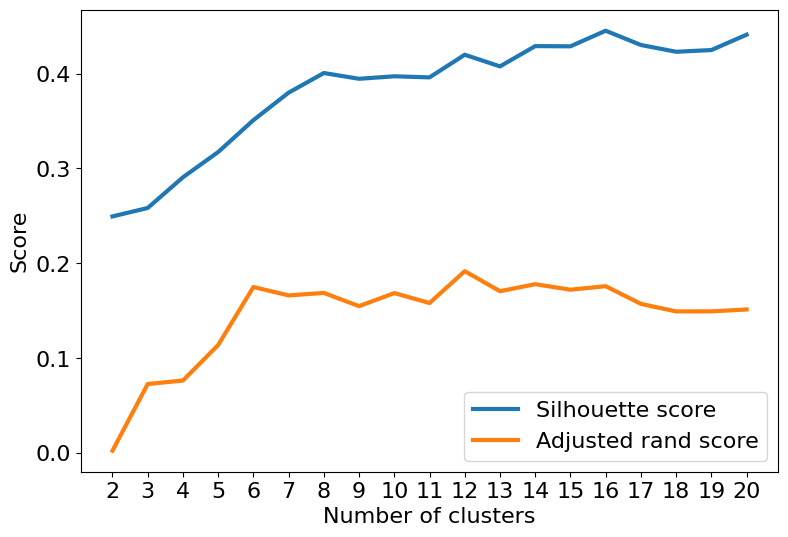

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

# Иерархическая кластеризация

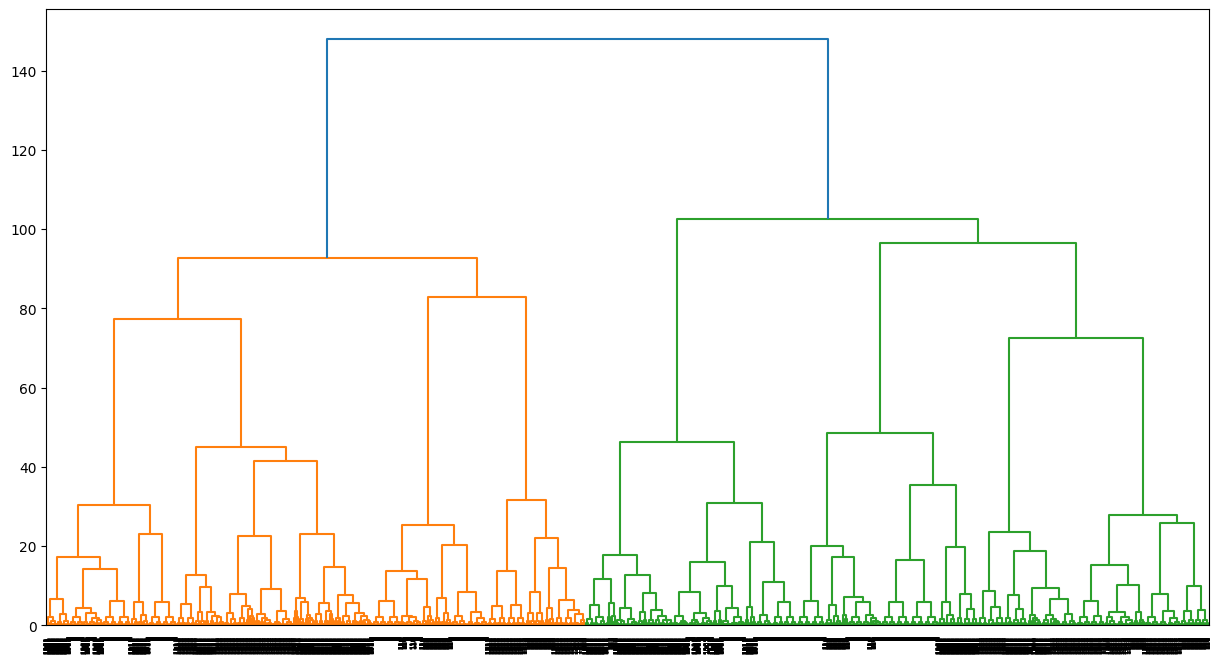

In [ ]:
samples = new_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

# DBSCAN


In [ ]:
mins = X.shape[1]

In [ ]:
db = DBSCAN(eps=0.5, min_samples=mins).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

for i in labels:
  print(i, end=' ')

-1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Подберем оптимальное значение eps и min_samples

In [ ]:
db = DBSCAN(eps=0.05, min_samples=mins).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

for i in labels:
  print(i, end=' ')

-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:-0.09
Adjusted Rand Index: 0.80


**Оценка силуэта -0,09 близка к 0, что обозначает перекрывающиеся кластеры**

**Оценка скорректированного рэнда 0.8 - хорошее восстановление**

{0, 1, 2, 3, 4, 5, 6, -1}


<ipython-input-272-d4c6b77a05d1>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(unique_labels))


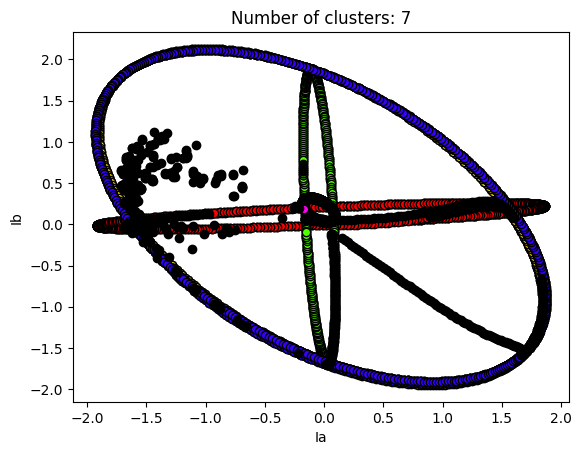

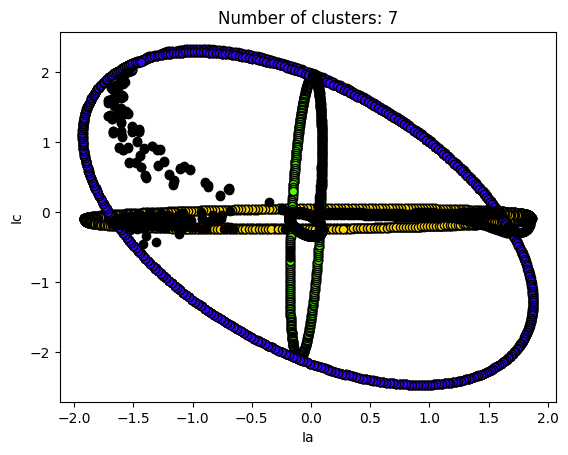

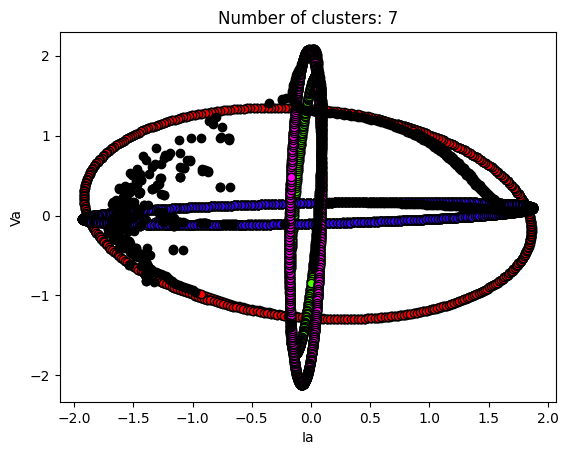

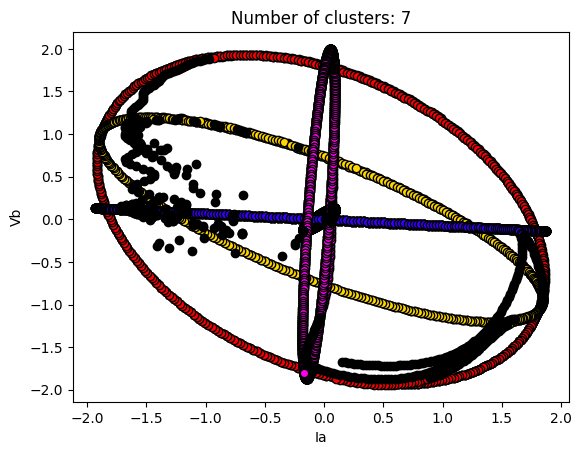

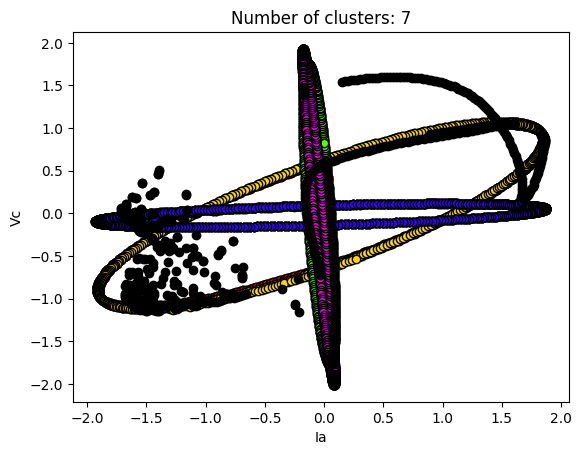

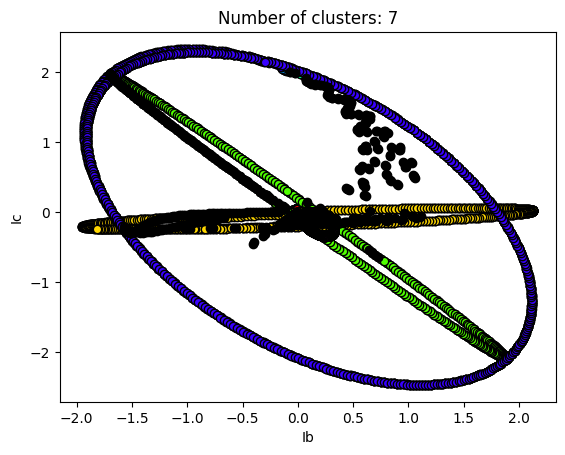

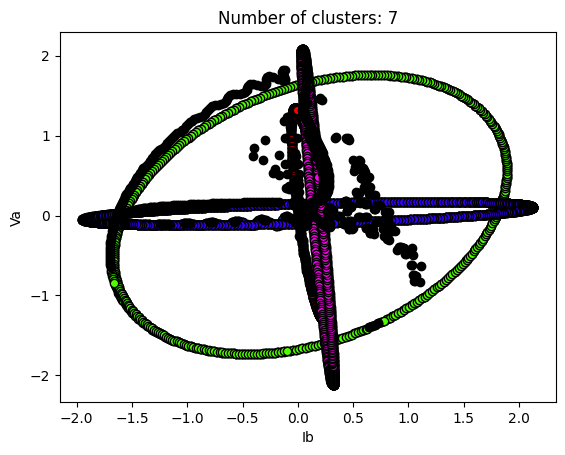

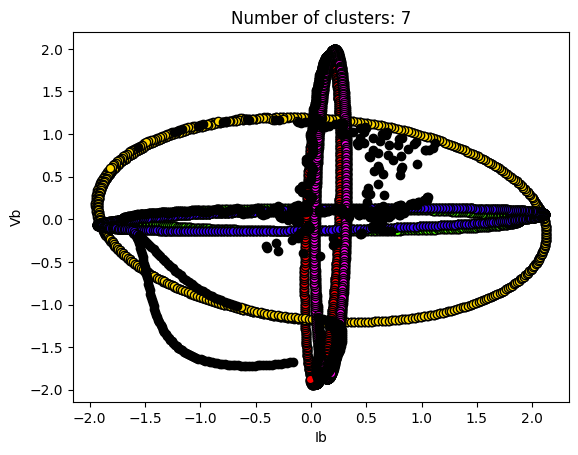

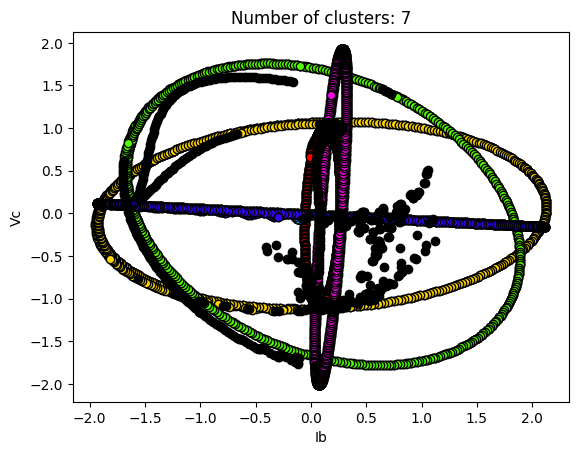

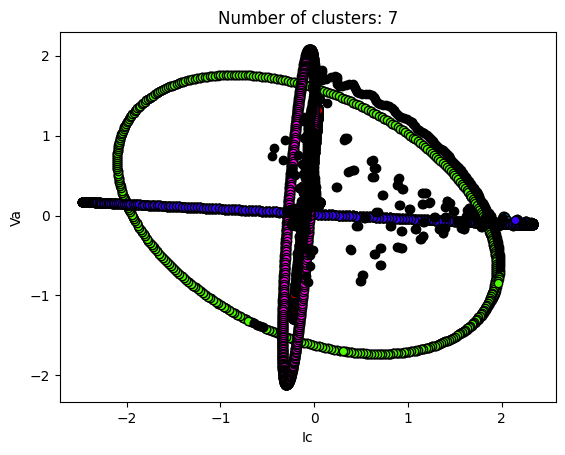

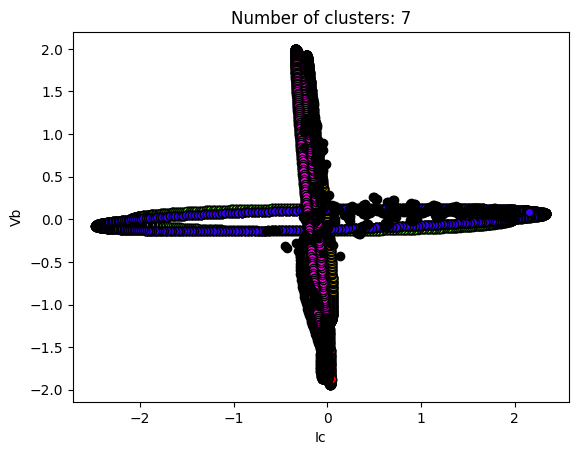

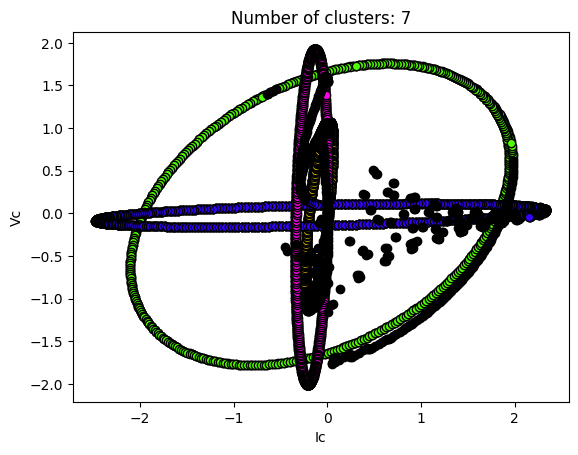

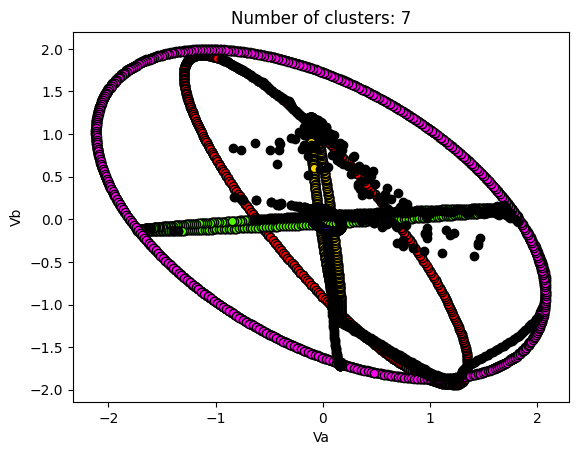

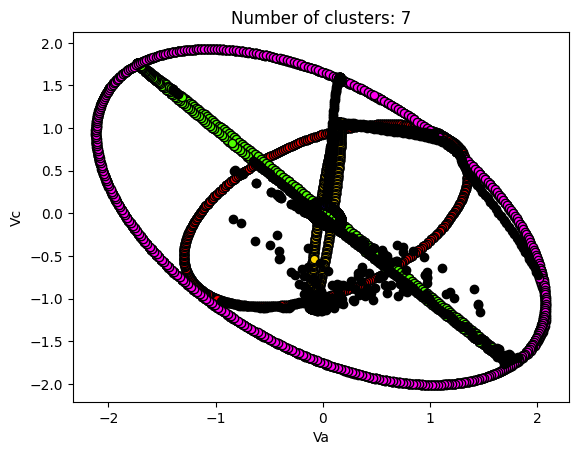

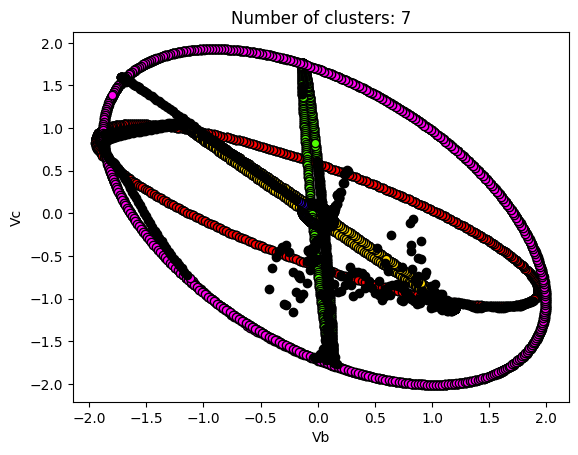

In [ ]:
unique_labels = set(labels)
print(unique_labels)
colors = plt.cm.get_cmap('hsv', len(unique_labels))

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        feature1 = features[i]
        feature2 = features[j]

        plt.figure()

        for k in unique_labels:
            col = colors(k)

            if k == -1:
                col = 'k'  # Черный для шума

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[feature1], xy[feature2], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[feature1], xy[feature2], 'o', markerfacecolor=col,
                     markeredgecolor='k', markersize=6)

        plt.title('Number of clusters: %d' % n_clusters_)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()